# spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load Data
- 보시면 spam.csv는 라벨이 있는 데이터예요. 물론 8주차 주체가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려볼 수도 있어요!

In [2]:
data = pd.read_csv('./spam.csv')

In [3]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ham     4825
spam     747
Name: v1, dtype: int64


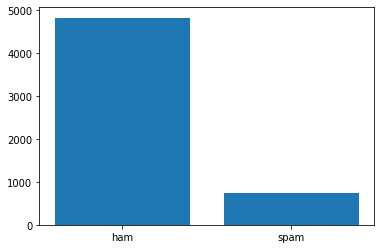

In [4]:
print(data['v1'].value_counts())
plt.bar(data['v1'].value_counts().index,data['v1'].value_counts())
plt.show()

In [5]:
#spam과 ham 나눠주기
spam = data[data['v1'] == 'spam']
ham = data[data['v1'] == 'ham']

In [6]:
print(spam.head())
print(ham.head())

      v1                                                 v2
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
5   spam  FreeMsg Hey there darling it's been 3 week's n...
8   spam  WINNER!! As a valued network customer you have...
9   spam  Had your mobile 11 months or more? U R entitle...
11  spam  SIX chances to win CASH! From 100 to 20,000 po...
    v1                                                 v2
0  ham  Go until jurong point, crazy.. Available only ...
1  ham                      Ok lar... Joking wif u oni...
3  ham  U dun say so early hor... U c already then say...
4  ham  Nah I don't think he goes to usf, he lives aro...
6  ham  Even my brother is not like to speak with me. ...


## Tokenizing
- 실습코드는 물론 한국어 대상이라 konlpy를 다뤘지만, 슬라이드 보시면 영어는 nltk 모듈을 쓸 수 있어요. 의미 있는 토큰으로 쪼개고 불용어도 처리해보세요! 현존하는 불용어 리스트를 사용해도 좋고, 새롭게 만들어도 좋을 것 같아요!

In [9]:
import nltk
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

### 특수기호, 숫자, 불용어 처리

In [10]:
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct
def remove_digit(text):
    no_digit = "".join([c for c in text if c not in string.digits])
    return no_digit
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [11]:
spam.loc[:,'v2'] = spam['v2'].apply(lambda x: remove_punctuation(x))
spam.loc[:,'v2'] = spam['v2'].apply(lambda x: remove_digit(x))
ham.loc[:,'v2'] = ham['v2'].apply(lambda x: remove_punctuation(x))
ham.loc[:,'v2'] = ham['v2'].apply(lambda x: remove_digit(x))

### 토큰화

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
spam.loc[:,'v2'] = spam['v2'].apply(lambda x: tokenizer.tokenize(x.lower()))
spam.loc[:,'v2'] = spam['v2'].apply(lambda x: remove_stopwords(x))
ham.loc[:,'v2'] = ham['v2'].apply(lambda x: tokenizer.tokenize(x.lower()))
ham.loc[:,'v2'] = ham['v2'].apply(lambda x: remove_stopwords(x))

### 전체 데이터 처리

In [13]:
data.loc[:,'v2'] = data['v2'].apply(lambda x: remove_punctuation(x))
data.loc[:,'v2'] = data['v2'].apply(lambda x: remove_digit(x))
data.loc[:,'v2'] = data['v2'].apply(lambda x: tokenizer.tokenize(x.lower()))
data.loc[:,'v2'] = data['v2'].apply(lambda x: remove_stopwords(x))

In [14]:
print(spam.head())
print(ham.head())

      v1                                                 v2
2   spam  [free, entry, wkly, comp, win, fa, cup, final,...
5   spam  [freemsg, hey, darling, weeks, word, back, id,...
8   spam  [winner, valued, network, customer, selected, ...
9   spam  [mobile, months, u, r, entitled, update, lates...
11  spam  [six, chances, win, cash, pounds, txt, csh, se...
    v1                                                 v2
0  ham  [go, jurong, point, crazy, available, bugis, n...
1  ham                     [ok, lar, joking, wif, u, oni]
3  ham      [u, dun, say, early, hor, u, c, already, say]
4  ham  [nah, dont, think, goes, usf, lives, around, t...
6  ham  [even, brother, like, speak, treat, like, aids...


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었어요. 왜 이 임베딩 모델을 적용하게 되었는지 '비교' 결과와 함께 적어주세요!

In [15]:
#한글자 token 제거 함수
def remove_one(arr):
    remove_list = []
    for i in range(len(arr)):
        if len(arr[i]) < 2:
            remove_list.append(arr[i])
    for j in remove_list:
        arr.remove(j)
    return arr

In [16]:
corpus = [remove_one(i) for i in data['v2']]
# corpus

In [17]:
words = []
for i in data['v2']:
    words.extend(i)

In [18]:
from collections import Counter

### 빈도 수 상위 20개

In [19]:
cnt = Counter(words)
top20_cnt = sorted(cnt.items(), key = lambda x:x[1], reverse = True)[:20]
top20_cnt

[('call', 579),
 ('im', 464),
 ('get', 390),
 ('ur', 384),
 ('go', 282),
 ('dont', 279),
 ('free', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('know', 257),
 ('like', 242),
 ('got', 239),
 ('ill', 237),
 ('good', 234),
 ('come', 226),
 ('day', 211),
 ('time', 208),
 ('love', 195),
 ('want', 192),
 ('send', 190)]

### 문장별 평균 단어 개수

In [20]:
(data['v2'].apply(lambda x: len(x)).sum())/ len(data)

8.517587939698492

### embedding

In [21]:
from gensim.models import Word2Vec, FastText

In [22]:
fasttext_model = FastText(corpus, size = 20, window = 5, min_count = 50, workers =1 , iter = 100,sg=1)

In [23]:
Skip_Gram_model = Word2Vec(corpus, size = 20, window = 5, min_count = 50 , workers = 1, iter = 100, sg = 1)

 - 빈도수를 기반으로 min_count = 50으로 설정
 - 문장별 평균 단어 개수를 기반으로 window는 5로 설정
 - size는 2, 10, 20 단위로 실험해봤을 때 20이 좋은 성능을 보였다
 - 너무 큰 차원은 다루지 않기 위해 20을 maximum으로 실험했다
 - skip_gram을 위해 sg=1

In [24]:
words = Skip_Gram_model.wv.index2word
words

['call',
 'im',
 'get',
 'ur',
 'go',
 'dont',
 'free',
 'ok',
 'ltgt',
 'know',
 'like',
 'got',
 'ill',
 'good',
 'come',
 'day',
 'time',
 'love',
 'want',
 'send',
 'text',
 'going',
 'one',
 'need',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'stop',
 'back',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'later',
 'well',
 'hi',
 'think',
 'da',
 'please',
 'take',
 'phone',
 'cant',
 'week',
 'claim',
 'much',
 'night',
 'dear',
 'oh',
 'great',
 'hey',
 'pls',
 'happy',
 'hope',
 'make',
 'way',
 'give',
 'work',
 'wat',
 'thats',
 'number',
 'prize',
 'right',
 'yes',
 'say',
 'already',
 'tomorrow',
 'ask',
 'really',
 'yeah',
 'said',
 'message',
 'msg',
 'amp',
 'didnt',
 'meet',
 'babe',
 'last',
 'morning',
 'life',
 'miss',
 'would',
 'cos',
 'thanks',
 'ive',
 'cash',
 'lol',
 'anything',
 'find',
 'every',
 'win',
 'nokia',
 'sure',
 'pick',
 'also',
 'let',
 'something',
 'contact',
 'sent',
 'keep',
 'care',
 'urgent',
 'buy',
 'us',
 'next',
 'feel',
 'f

In [25]:
words = fasttext_model.wv.index2word
words

['call',
 'im',
 'get',
 'ur',
 'go',
 'dont',
 'free',
 'ok',
 'ltgt',
 'know',
 'like',
 'got',
 'ill',
 'good',
 'come',
 'day',
 'time',
 'love',
 'want',
 'send',
 'text',
 'going',
 'one',
 'need',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'stop',
 'back',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'later',
 'well',
 'hi',
 'think',
 'da',
 'please',
 'take',
 'phone',
 'cant',
 'week',
 'claim',
 'much',
 'night',
 'dear',
 'oh',
 'great',
 'hey',
 'pls',
 'happy',
 'hope',
 'make',
 'way',
 'give',
 'work',
 'wat',
 'thats',
 'number',
 'prize',
 'right',
 'yes',
 'say',
 'already',
 'tomorrow',
 'ask',
 'really',
 'yeah',
 'said',
 'message',
 'msg',
 'amp',
 'didnt',
 'meet',
 'babe',
 'last',
 'morning',
 'life',
 'miss',
 'would',
 'cos',
 'thanks',
 'ive',
 'cash',
 'lol',
 'anything',
 'find',
 'every',
 'win',
 'nokia',
 'sure',
 'pick',
 'also',
 'let',
 'something',
 'contact',
 'sent',
 'keep',
 'care',
 'urgent',
 'buy',
 'us',
 'next',
 'feel',
 'f

In [26]:
vectors1 = Skip_Gram_model.wv.vectors
vectors1

array([[ 0.38248298,  0.56459475,  0.22340497, ...,  0.61944824,
        -0.4828775 ,  0.5634809 ],
       [-0.08877974,  0.18561932, -0.36824352, ...,  0.10391185,
        -0.35653636,  0.4258701 ],
       [ 0.4719722 ,  0.29613626, -0.2127543 , ...,  0.16100761,
        -0.34099904,  0.2864628 ],
       ...,
       [ 0.7092978 , -0.04098586, -0.3125327 , ..., -0.01747875,
        -0.31884003,  0.21351725],
       [ 0.2389834 ,  0.97481537, -0.2499452 , ...,  1.9360249 ,
         0.5180855 ,  1.0077442 ],
       [ 1.3953466 ,  0.8555277 , -1.0535187 , ...,  0.67290646,
        -0.4290489 ,  0.49335748]], dtype=float32)

In [27]:
vectors = fasttext_model.wv.vectors
vectors

array([[-0.09180381, -0.3674853 ,  0.08627755, ...,  1.082597  ,
         0.30169404, -0.234365  ],
       [ 0.26548156,  0.1956567 , -0.27470142, ...,  0.37317532,
         0.01648752, -0.03169765],
       [ 0.02181263,  0.04516581,  0.15692393, ...,  0.11292879,
        -0.2150964 , -0.03991193],
       ...,
       [-0.41731697, -0.11743989, -0.443747  , ..., -0.3891473 ,
         0.22946784,  0.0810848 ],
       [ 0.24914737,  0.31962782, -0.26441014, ...,  0.7109328 ,
         1.1870162 , -0.79096526],
       [-0.08963289,  0.92251265,  1.058488  , ..., -0.42711535,
         0.3882784 ,  0.50154996]], dtype=float32)

In [28]:
top5_word = [top20_cnt[i][0] for i in range(5)]
top5_word

['call', 'im', 'get', 'ur', 'go']

In [29]:
for word in top5_word:
    print("word:",word)
    print("Skip_gram")
    print(Skip_Gram_model.wv.most_similar(word, topn=5))
    print("fasttext")
    print(fasttext_model.wv.most_similar(word, topn=5))
    print("-------------------------------------------------------------")
    print()

word: call
Skip_gram
[('guaranteed', 0.7039927244186401), ('prize', 0.7036927938461304), ('please', 0.643821656703949), ('mobile', 0.6408004760742188), ('urgent', 0.5857738256454468)]
fasttext
[('please', 0.6694702506065369), ('phone', 0.6412845849990845), ('urgent', 0.5982739925384521), ('guaranteed', 0.5900270342826843), ('text', 0.5826404690742493)]
-------------------------------------------------------------

word: im
Skip_gram
[('ok', 0.8191996812820435), ('home', 0.7973576784133911), ('tonight', 0.7817539572715759), ('go', 0.7520568370819092), ('ill', 0.7471689581871033)]
fasttext
[('home', 0.7660596966743469), ('go', 0.763390302658081), ('work', 0.7564711570739746), ('ok', 0.7555367350578308), ('going', 0.7509610652923584)]
-------------------------------------------------------------

word: get
Skip_gram
[('tell', 0.6999614834785461), ('week', 0.6836384534835815), ('txt', 0.6834967136383057), ('want', 0.6769862771034241), ('text', 0.6648395657539368)]
fasttext
[('tell', 0.7812

### 모델 비교
 - 빈도 상위 5개의 단어별 코사인 유사도를 model에 따라 확인했다
 - 두 모델이 비슷한 결과들을 보인다
 - 하지만 fasttext모델이 더 의미상으로 비슷한 단어 뿐아니라 유사도 또한 같은 단어에 대해서 높게 나온것을 확인할 수 있다
 - 따라서 fasttext모델의 성능이 더 좋은것으로 생각된다.

## 본인이 도출해낸 해석을 적어주세요!

- Plot, Wordcloud, 이진 분류 모델, 유사도 뭐든 관계없으니 분명하고 인상적인 해석 부탁드려요!

In [33]:
from wordcloud import WordCloud

In [30]:
#wordcloud 전처리
spam_words = []
ham_words = []
for i in spam['v2']:
    spam_words.extend(i)
for i in ham['v2']:
    ham_words.extend(i)

spam_text = " ".join(spam_words)
ham_text = " ".join(ham_words)

In [31]:
spam_text = " ".join(spam_words)
ham_text = " ".join(ham_words)

## spam wordcloud

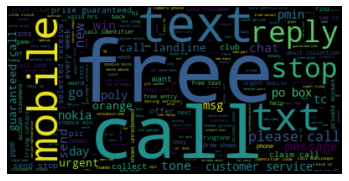

In [34]:
#spam wordcloud
wordcloud_spam = WordCloud(max_font_size=100).generate(spam_text)
plt.imshow(wordcloud_spam, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [35]:
count_spam = sorted(wordcloud_spam.words_.items(), key = lambda x:x[1], reverse = True)
[count_spam[:10][i][0] for i in range(10)]

['free',
 'call',
 'text',
 'mobile',
 'txt',
 'reply',
 'stop',
 'please call',
 'new',
 'message']

### Insigth_1
 - spam에서 자주 사용된 단어를 이용한 wordcloud
 - spam에서 사용된 단어 중 빈도수 상위 10개
 - call, text, reply 등 연락과 관련된 단어가 많이 포함되있는것을 확인할 수 있다

## ham wordcloud

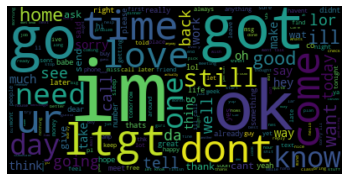

In [36]:
#ham wordcloud
wordcloud_ham = WordCloud(max_font_size=100).generate(ham_text)
plt.imshow(wordcloud_ham, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [37]:
count_ham = sorted(wordcloud_ham.words_.items(), key = lambda x:x[1], reverse = True)
[count_ham[:10][i][0] for i in range(10)]

['im', 'ok', 'got', 'go', 'ltgt', 'come', 'time', 'ur', 'dont', 'love']

### Insight_2
- ham에서 자주 사용된 단어를 이용한 wordcloud
 - ham에서 사용된 단어 중 빈도수 상위 10개
 - im, ok, got, go 등 상태에 대한 단어가 많이 등장한다

## ham 상위 5개 단어별 유사도를 활용한 spam/ham 비교

In [38]:
for hams_word in [count_ham[:5][i][0] for i in range(5)]:
    similar = [fasttext_model.wv.most_similar(hams_word, topn=10)[i][0] for i in range(10)]
    tf_list = [text in spam_words for text in similar]
    print(hams_word,":",tf_list)

im : [True, True, True, True, True, True, False, True, True, True]
ok : [True, True, True, True, True, False, False, False, True, True]
got : [False, True, False, True, True, False, True, True, True, True]
go : [True, True, False, True, True, True, False, False, True, True]
ltgt : [False, True, True, True, True, True, True, True, True, True]


In [39]:
for hams_word in [count_ham[:5][i][0] for i in range(5)]:
    similar = [fasttext_model.wv.most_similar(hams_word, topn=10)[i][0] for i in range(10)]
    tf_list = [text in ham_words for text in similar]
    print(hams_word,":",tf_list)

im : [True, True, True, True, True, True, True, True, True, True]
ok : [True, True, True, True, True, True, True, True, True, True]
got : [True, True, True, True, True, True, True, True, True, True]
go : [True, True, True, True, True, True, True, True, True, True]
ltgt : [True, True, True, True, True, True, True, True, True, True]


### Insight_3
 - ham의 상위 5개 단어별로 모델에서 유사한 10개의 단어들이 spam/ham 포함되어있는지를 확인
 - spam 단어리스트에 포함되어있는지 확인할 때 포함되지 않은 경우 존재한다
 - ham 단어리스트에 포함되어있는지 확인할 때 포함되지 않은 경우 존재하지 않는다
 - 즉, 단어들은 같은 라벨의 단어들과 유사도가 높은 것을 확인할 수 있다